# This notebook examines trends in the processed general.txt file (general.pkl)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import os
import re
import cpi

processed_path = '/data/ihwang/data_journalism/allfac/processed/'
df_general = pd.read_pickle(processed_path + 'general.pkl')

# Agency prefix dictionary:
with open(processed_path + 'agency_dict.pkl', 'rb') as f_r:
    agency_dict = pickle.load(f_r)
# Entity code dictionary:
with open(processed_path + 'entity_dict.pkl', 'rb') as f_r:
    entity_dict = pickle.load(f_r)

Fields carried over from processing general.txt

In [2]:
for i in df_general.columns:
    print(i)

DBKEY
AUDITYEAR
STATE
CPASTATE
CPAPHONE
TYPEOFENTITY
COGAGENCY
OVERSIGHTAGENCY
TOTFEDEXPEND
LOWRISK
AUDITEENAME
CPAFIRMNAME
CPACONTACT
CPATITLE
ZIPCODE
CPAZIPCODE
TYPEREPORT_FS
SP_FRAMEWORK
SP_FRAMEWORK_REQUIRED
TYPEREPORT_SP_FRAMEWORK
TYPEREPORT_MP
REPORTABLECONDITION
MATERIALWEAKNESS
MATERIALNONCOMPLIANCE
REPORTABLECONDITION_MP
MATERIALWEAKNESS_MP
QCOSTS
GOINGCONCERN
CITY
CPACITY
EIN
DOLLARTHRESHOLD


Adjust `DOLLARTHRESHOLD` and `TOTFEDEXPEND_ADJUSTED` for inflation

In [3]:
df_general['DOLLARTHRESHOLD_ADJUSTED'] = df_general.apply(lambda x: cpi.inflate(x.DOLLARTHRESHOLD, x.AUDITYEAR), axis=1)
df_general['TOTFEDEXPEND_ADJUSTED'] = df_general.apply(lambda x: cpi.inflate(x.TOTFEDEXPEND, x.AUDITYEAR), axis=1)

# Basics

Select data to examine

In [4]:
df_analysis = df_general

How has the total number of audits changed over time?

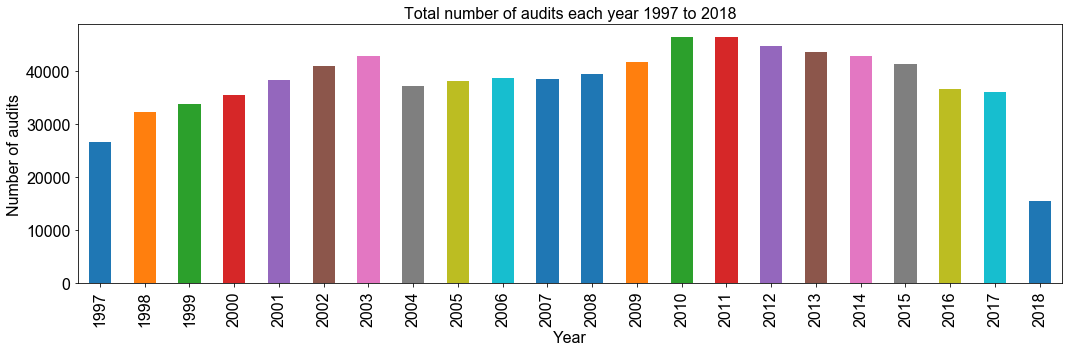

Total number of audits: 838217


In [5]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_num = df_analysis['AUDITYEAR'].value_counts().sort_index()
year_num_plot = series_year_num.plot(kind='bar', fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Number of audits', fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Total number of audits each year %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What is the total amount of federal money subjected to audits over time?

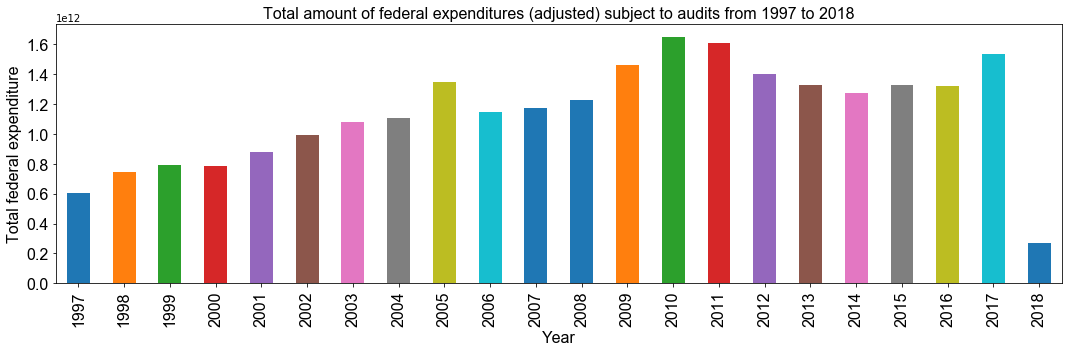

Total number of audits: 838217


In [6]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_totexpend = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].sum().sort_index()
year_totexpend_plot = series_year_totexpend.plot(kind='bar', fontsize=16, ax=axes)
year_totexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_totexpend_plot.set_ylabel('Total federal expenditure', fontsize=16, fontname='Arial')
year_totexpend_plot.set_title(
    'Total amount of federal expenditures (adjusted) subject to audits from %s to %s' 
    %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What has been each year's largest amount of federal money subject to an audit?

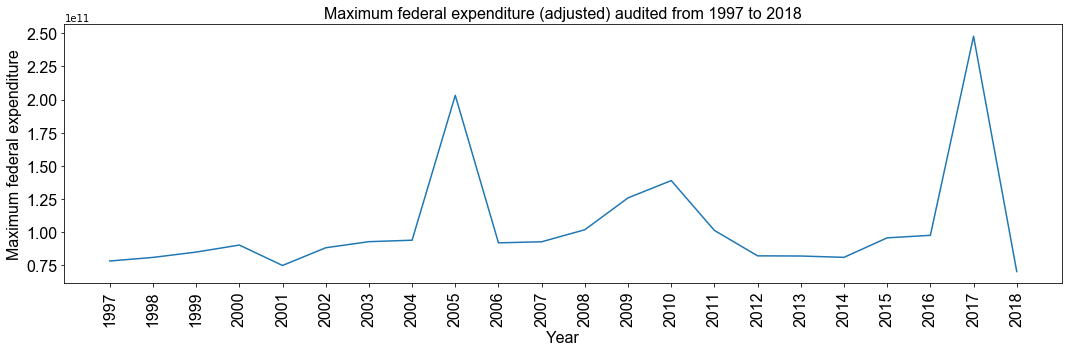

Total number of audits: 838217


In [7]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_maxexpend = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].max()
year_maxexpend_plot = series_year_maxexpend.plot(kind='line', fontsize=16, ax=axes)
year_maxexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_xticks(series_year_num.index)
year_maxexpend_plot.set_ylabel('Maximum federal expenditure', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_title(
    'Maximum federal expenditure (adjusted) audited from %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial', rotation=90)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

In [8]:
idx_year_max = df_analysis.groupby('AUDITYEAR')['TOTFEDEXPEND_ADJUSTED'].transform(max) == df_analysis['TOTFEDEXPEND_ADJUSTED']
df_analysis[idx_year_max][['AUDITYEAR', 'AUDITEENAME', 'TOTFEDEXPEND_ADJUSTED']].sort_values('AUDITYEAR')

,AUDITYEAR,AUDITEENAME,TOTFEDEXPEND_ADJUSTED
70174,1997,CALIFORNIA STATE REPORT,7.834921e+10
70175,1998,CALIFORNIA STATE REPORT,8.104556e+10
70176,1999,STATE OF CALIFORNIA,8.506873e+10
70177,2000,STATE OF CALIFORNIA,9.036922e+10
70178,2001,STATE OF CALIFORNIA,7.498343e+10
70179,2002,STATE OF CALIFORNIA,8.832401e+10
70180,2003,STATE OF CALIFORNIA,9.291915e+10
70181,2004,STATE OF CALIFORNIA,9.402078e+10
785408,2005,JOHNS HOPKINS UNIVERSITY,2.032065e+11
70183,2006,STATE OF CALIFORNIA,9.203489e+10


Do these outliers make sense? Let's check them

In [26]:
df_analysis.loc[785408]
df_analysis[df_analysis['EIN']==520595110][['AUDITYEAR', 'TOTFEDEXPEND_ADJUSTED', 'DOLLARTHRESHOLD_ADJUSTED']]
# df_analysis.loc[321123]
# df_analysis[df_analysis['EIN']==710497135][['AUDITYEAR', 'TOTFEDEXPEND_ADJUSTED', 'DOLLARTHRESHOLD_ADJUSTED']]

,AUDITYEAR,TOTFEDEXPEND_ADJUSTED,DOLLARTHRESHOLD_ADJUSTED
785400,1997,1.418200e+09,4.693589e+06
785401,1998,1.452402e+09,4.621601e+06
785402,1999,1.458329e+09,4.521735e+06
785403,2000,1.475117e+09,4.374686e+06
785404,2001,1.607711e+09,4.510284e+06
785405,2002,1.807473e+09,5.121243e+06
785406,2003,1.916637e+09,5.659460e+06
785407,2004,2.053328e+09,5.811751e+06
785408,2005,2.032065e+11,5.836020e+06
785409,2006,2.040718e+09,5.847953e+06


What is the median `DOLLARTHRESHOLD_ADJUSTED` per year?

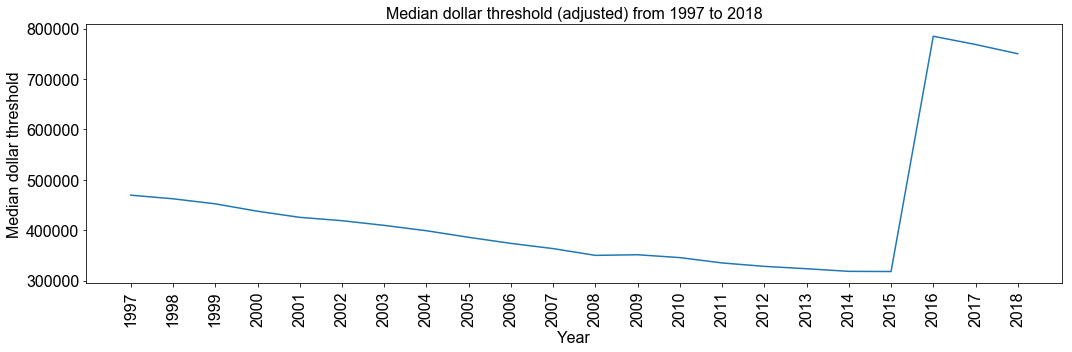

Total number of audits: 838217


In [10]:
fig, axes = plt.subplots(figsize=(15, 5))
series_year_maxexpend = df_analysis.groupby('AUDITYEAR')['DOLLARTHRESHOLD_ADJUSTED'].median()
year_maxexpend_plot = series_year_maxexpend.plot(kind='line', fontsize=16, ax=axes)
year_maxexpend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_xticks(series_year_num.index)
year_maxexpend_plot.set_ylabel('Median dollar threshold', fontsize=16, fontname='Arial')
year_maxexpend_plot.set_title(
    'Median dollar threshold (adjusted) from %s to %s' %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial', rotation=90)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What percent of auditees are low risk?

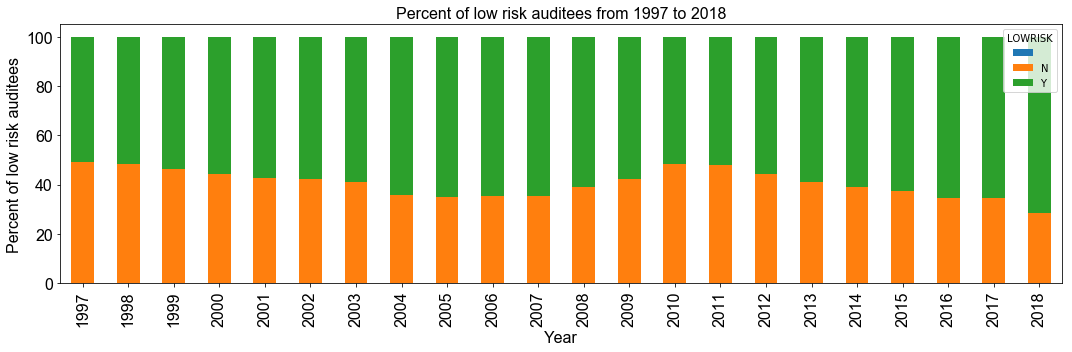

Total number of audits: 838217


In [11]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_num = df_analysis.groupby('AUDITYEAR')['LOWRISK'].value_counts().sort_index().unstack()
df_year_pct = df_year_num.div(df_year_num.sum(axis=1), axis=0) * 100
year_num_plot = df_year_pct.plot(kind='bar', stacked=True, fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Percent of low risk auditees', fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Percent of low risk auditees from %s to %s' 
    %(min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

What percent of auditees have a financial issue? Choose between `QCOSTS`, `GOINGCONCERN`, `MATERIALWEAKNESS`, `MATERIALNONCOMPLIANCE`

In [12]:
# sortby = 'QCOSTS'
sortby = 'MATERIALNONCOMPLIANCE'
# sortby = 'GOINGCONCERN'
# sortby = 'MATERIALWEAKNESS'


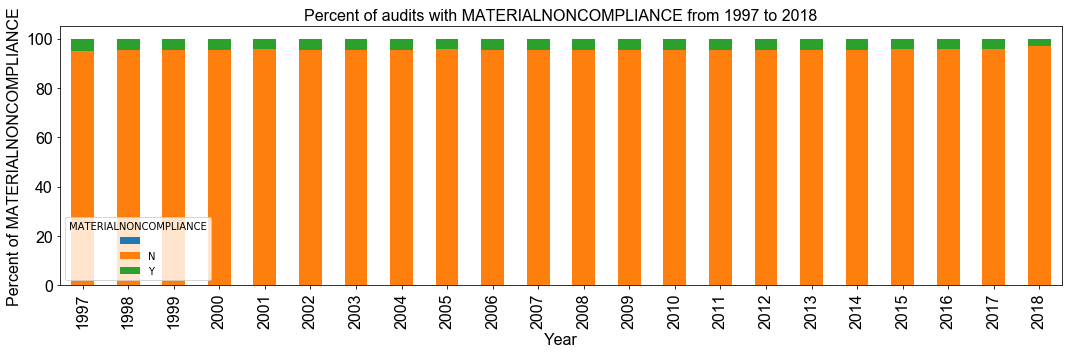

Total number of audits: 838217


In [13]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_num = df_analysis.groupby('AUDITYEAR')[sortby].value_counts().sort_index().unstack()
df_year_pct = df_year_num.div(df_year_num.sum(axis=1), axis=0) * 100
year_num_plot = df_year_pct.plot(kind='bar', stacked=True, fontsize=16, ax=axes)
year_num_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_num_plot.set_xticklabels(labels=series_year_num.index, fontsize=16, fontname='Arial')
year_num_plot.set_ylabel('Percent of %s' %sortby, fontsize=16, fontname='Arial')
year_num_plot.set_title(
    'Percent of audits with %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

## Do more specific analysis based on selected data and sortby

Select data

In [14]:
df_analysis = df_general
# df_analysis = df_general[df_general['LOWRISK']=='N']
# df_analysis = df_general[df_general['TOTFEDEXPEND'] <= 1e6]
# df_analysis = df_general[df_general['TOTFEDEXPEND'] >= 3e6]
# df_analysis = df_general[(df_general['TOTFEDEXPEND'] >= 1e6) & (df_general['TOTFEDEXPEND'] <= 5e6)]

# Remove territories/islands
df_analysis = df_analysis[~df_analysis['STATE'].isin(['AS','MP','FM','PR','GU','PW','MH','VI'])]

# Analyze only territories/islands!
# df_analysis = df_analysis[df_analysis['STATE'].isin(['AS','MP','FM','PR','GU','PW','MH','VI'])]
# df_analysis = df_analysis[df_analysis['STATE'].isin(['AS','MP','FM','GU','PW','MH','VI'])]

Select sortby

In [15]:
# sortby = 'TYPEOFENTITY'
sortby = 'STATE'
# sortby = 'COGAGENCY'
# sortby = 'OVERSIGHTAGENCY'

Now plot percent of audits by entity type

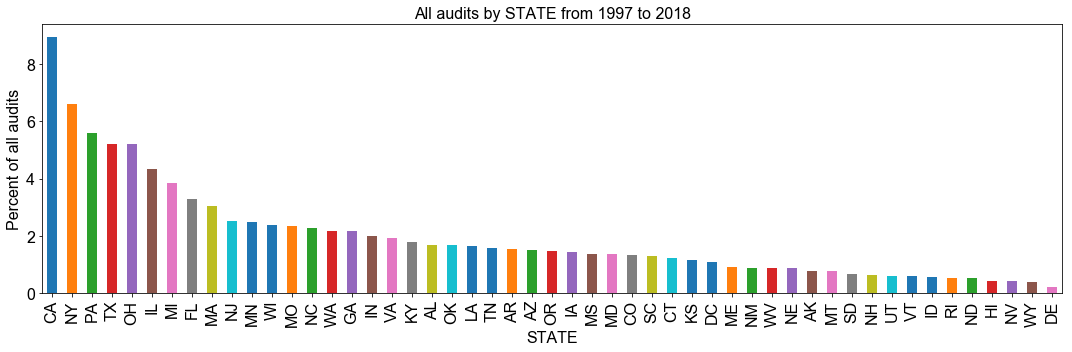

Total number of audits: 831431


In [16]:
fig, axes = plt.subplots(figsize=(15, 5))
series_sortby = df_analysis.groupby(sortby).size().sort_values(ascending=False) / len(df_analysis) * 100
percent_audits_plot = series_sortby.plot(kind='bar', fontsize=16, ax=axes)
percent_audits_plot.set_xlabel(sortby, fontsize=16, fontname='Arial')
percent_audits_plot.set_xticklabels(labels=series_sortby.index, fontsize=16, fontname='Arial')
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16, fontname='Arial')
percent_audits_plot.set_title(
    'All audits by %s from %s to %s' %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()
print('Total number of audits:', len(df_analysis))

In [17]:
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.head(10).index:
        if entity in entity_dict.keys():
            print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.head(10).index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERISGHTAGENCY'):
    for agency in series_sortby.head(10).index:
        if agency in agency_dict.keys():
            print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

8.93543781745 	 CA
6.58960274515 	 NY
5.58771563726 	 PA
5.21498476723 	 TX
5.20921158821 	 OH
4.32158531496 	 IL
3.82918125497 	 MI
3.30225839547 	 FL
3.02694992128 	 MA
2.51626412775 	 NJ


What are trends over time?

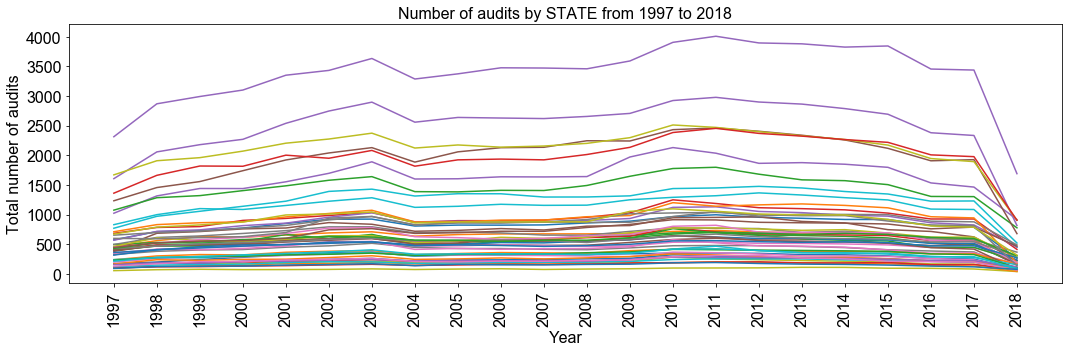

In [18]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_sortby = df_analysis.groupby('AUDITYEAR')[sortby].value_counts().unstack()
year_sortby_plot = df_year_sortby.plot(kind='line', fontsize=16, ax=axes, legend=False)
year_sortby_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_sortby_plot.set_xticks(df_year_sortby.index)
year_sortby_plot.set_xticklabels(labels=df_year_sortby.index, fontsize=16, fontname='Arial', rotation=90)
year_sortby_plot.set_ylabel('Total number of audits', fontsize=16, fontname='Arial')
year_sortby_plot.set_title(
    'Number of audits by %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()

In [19]:
year = 2017
series_sortby = df_year_sortby.loc[year].sort_values(ascending=False).head(10)
if sortby == 'TYPEOFENTITY':
    for entity in series_sortby.index:
        if entity in entity_dict.keys():
                print(series_sortby.loc[entity], '\t', entity, '\t', entity_dict[entity])
        else:
            print(series_sortby.loc[entity], '\t', entity, '\t')
elif sortby == 'STATE':
    for state in series_sortby.index:
        print(series_sortby.loc[state], '\t', state)
elif (sortby == 'COGAGENCY') or sortby == ('OVERSIGHTAGENCY'):
    for agency in series_sortby.index:
        if agency in agency_dict.keys():
                print(series_sortby.loc[agency], '\t', agency, '\t', agency_dict[agency])
        else:
            print(series_sortby.loc[agency], '\t', agency, '\t')

3438 	 CA
2335 	 NY
1978 	 TX
1927 	 OH
1894 	 PA
1465 	 IL
1304 	 MI
1231 	 FL
1087 	 MA
945 	 NJ


What are the total federal expenditures over time?

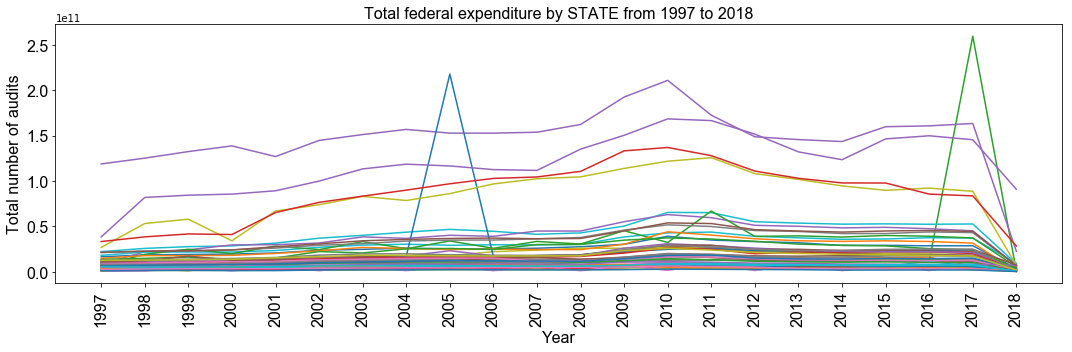

In [20]:
fig, axes = plt.subplots(figsize=(15, 5))
df_year_sortby_expend = df_analysis.groupby(['AUDITYEAR', sortby])['TOTFEDEXPEND_ADJUSTED'].sum().unstack()
# df_year_sortby_expend.drop(index=[1997,1998,1999,2000],columns='000', inplace=True)
year_sortby_expend_plot = df_year_sortby_expend.plot(kind='line', fontsize=16, ax=axes, legend=False)
year_sortby_expend_plot.set_xlabel('Year', fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_xticks(df_year_sortby.index)
year_sortby_expend_plot.set_xticklabels(labels=df_year_sortby.index, fontsize=16, fontname='Arial', rotation=90)
year_sortby_expend_plot.set_ylabel('Total number of audits', fontsize=16, fontname='Arial')
year_sortby_expend_plot.set_title(
    'Total federal expenditure by %s from %s to %s' 
    %(sortby, min(df_analysis['AUDITYEAR']), max(df_analysis['AUDITYEAR'])),
    fontsize=16, fontname='Arial'
)
plt.yticks(fontsize=16, fontname='Arial')
plt.tight_layout()
plt.show()